In [9]:
import numpy as np

def pred_options(S0, K, T, CP=1):
    """"
    S0 -> Stock price
    K -> strike price
    T -> Time
    CP -> Call (1) or put (0)
    """
    # Parameters for the Heston model
    # S0 = 17080.70    # initial stock price
    r = 0.10    # risk-free interest rate
    # T = 7.0/365.0     # time to maturity
    kappa = 2.0 # mean reversion speed
    theta = 0.1 # long-term volatility level
    sigma = 0.3 # volatility of volatility
    rho = -0.5  # correlation between the stock price and its volatility
    V0 = 0.1    # initial volatility

    # Option parameters
    # K = 16600    # strike price
    CP = 1     # call option (1) or put option (-1)
    M = 10000  # number of Monte Carlo simulations

    # Simulation parameters
    dt = 0.001 # time step for the Euler-Maruyama method
    N = int(T/dt) # number of time steps

    # Generate random normal variables for the stock price and its volatility
    Z1 = np.random.normal(size=(M,N))
    Z2 = rho*Z1 + np.sqrt(1-rho**2)*np.random.normal(size=(M,N))

    # Initialize arrays for the stock price and its volatility
    S = np.zeros((M,N+1))
    V = np.zeros((M,N+1))
    S[:,0] = S0
    V[:,0] = V0

    # Perform the Monte Carlo simulation
    for i in range(1,N+1):
        V[:,i] = V[:,i-1] + kappa*(theta - V[:,i-1])*dt + sigma*np.sqrt(V[:,i-1])*np.sqrt(dt)*Z2[:,i-1]
        S[:,i] = S[:,i-1]*np.exp((r - 0.5*V[:,i-1])*dt + np.sqrt(V[:,i-1])*np.sqrt(dt)*Z1[:,i-1])

    # Compute the option price
    if CP == 1:
        payoff = np.maximum(S[:,N]-K, 0)
    else:
        payoff = np.maximum(K-S[:,N], 0)

    price = np.mean(payoff)*np.exp(-r*T)

    return price


## Testing on entire test dataset

In [10]:
import pandas as pd
test_dataset = pd.read_csv("option-chain-ED-NIFTY-29-Mar-2023.csv")
test_dataset

CALLS  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME  CHNG IN OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      -1,640   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      -1,193   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005        -363   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      -1,433   
...                                                                                                                                                                      ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       -1,105   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798         -944   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462         -686   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -                -   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400      -     -        -      -                -   

                                                                                                                                                                 Unnamed: 1  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME         OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      5,360   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      1,980   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005      7,050   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      6,821   
...                                                                                                                                                                     ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       7,543   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798       1,964   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462       2,036   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -              23   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400   

In [11]:
test_dataset = test_dataset.dropna()

In [12]:
import csv
with open('option-chain-ED-NIFTY-29-Mar-2023.csv', 'r') as infile, open('Heston/output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [13]:
import csv

with open('Heston/output.csv', 'r') as input_file:
    with open('Heston/output1.csv', 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)
        next(reader)  # skip the header row
        for row in reader:
            writer.writerow(row)



In [14]:
test_df = pd.read_csv("Heston/output1.csv")
test_df

,Unnamed: 0,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1,Unnamed: 22
0,NaN,81,-2,18,380.62,"5,981.15",5.50,50,"5,947.40","5,987.00",...,0.20,0.25,"1,22,100",-0.10,0.20,248.58,"53,553","-1,640","5,360",NaN
1,NaN,3,2,4,366.10,"5,005.35",-5.65,100,"4,974.25","5,003.55",...,0.15,0.20,"21,800",-0.15,0.15,201.33,"22,492","-1,193","1,980",NaN
2,NaN,"5,127","-2,703","4,297",217.98,"3,973.10",-54.05,500,"3,971.95","3,990.15",...,0.20,0.30,"2,400",-0.25,0.20,160.17,"14,005",-363,"7,050",NaN
3,NaN,224,-5,35,-,"2,967.00",-53.35,200,"2,967.45","2,991.10",...,0.20,0.30,"97,500",-0.10,0.30,120.11,"24,367","-1,433","6,821",NaN
4,NaN,"7,710","-1,208","3,589",134.17,"1,984.55",-34.55,50,"1,979.00","1,982.75",...,0.20,0.25,"5,450",-0.50,0.25,78.52,"30,022",-367,"24,861",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,"47,354","5,166","36,722",103.82,0.35,-0.35,"7,050",0.35,0.50,...,"3,016.40","3,026.25",50,42.70,"3,023.80",-,"2,418","-1,105","7,543",NaN
93,NaN,"11,556","2,653","9,494",129.85,0.25,-0.35,"17,450",0.25,0.45,...,"4,015.80","4,035.75",50,52.65,"4,027.25",-,"1,798",-944,"1,964",NaN
94,NaN,"9,893","1,356","6,323",157.35,0.30,-0.30,"6,650",0.30,0.35,...,"5,020.40","5,033.95",100,29.90,"5,015.35",199.06,"1,462",-686,"2,036",NaN
95,NaN,"4,993",776,"2,621",181.69,0.30,-0.35,"15,650",0.30,0.35,...,"5,982.55","6,061.25",400,-,-,-,-,-,23,NaN


In [15]:
Strike_price = list(test_df["STRIKE"])
Stock_price = [17080.70] * len(Strike_price)
Option_price = list(test_df["LTP"])
Time_expire = [8/365.0] * len(Strike_price)

for i in range(len(Strike_price)):

    tmp = Strike_price[i].split(",")
    Strike_price[i] = float("".join(tmp))

for i in range(len(Option_price)):
    if (Option_price[i] == "-"):
        Option_price[i] = 0
    else:
        tmp = Option_price[i].split(",")
        Option_price[i] = float("".join(tmp))

In [16]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(Option_price), Option_price)
print (len(Time_expire), Time_expire)

97 [11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 19700.0, 19750.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0]
97 [17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17

In [17]:
pred_option = []

for S, K, T in zip(Stock_price, Strike_price, Time_expire):
    pred_option.append(pred_options(S,K,T))

In [18]:
print (len(Option_price), Option_price)
print (len(pred_option), pred_option)

97 [5981.15, 5005.35, 3973.1, 2967.0, 1984.55, 0, 1455.0, 1468.5, 0, 0, 1289.0, 0, 1165.0, 0, 1050.0, 1092.2, 983.65, 920.0, 860.0, 820.0, 760.55, 732.0, 683.75, 615.0, 580.0, 533.05, 480.0, 428.65, 381.9, 334.35, 281.35, 234.4, 188.3, 144.25, 105.0, 68.0, 42.9, 24.1, 12.5, 5.25, 2.85, 1.95, 1.65, 1.35, 1.1, 1.1, 0.9, 0.95, 0.8, 0.65, 0.6, 0.85, 0.7, 0.75, 0.75, 0.5, 0.6, 0.25, 0.35, 0.5, 0.35, 0.4, 0.35, 0.4, 0.4, 0.45, 0.4, 0.4, 0.45, 0.4, 0.55, 0.55, 0.6, 0.5, 0.6, 0.45, 0.45, 0.4, 0.35, 0.45, 0.4, 0.45, 0.4, 0.6, 0.35, 0.45, 0.25, 0.4, 0.4, 0.4, 0.4, 0.4, 0.35, 0.25, 0.3, 0.3, 0.3]
97 [6118.519837604867, 5123.112213797824, 4090.40497221994, 3101.815638906262, 2127.6594335471023, 1669.5707786763583, 1617.4943465502913, 1565.7419113995393, 1532.125941421326, 1467.6310283628527, 1410.7334471281783, 1378.3799570705962, 1323.3147155280813, 1281.1993417644048, 1239.7335854411288, 1187.6482562035476, 1146.215432332988, 1096.3743681646984, 1056.4780853267284, 1000.1278091900482, 952.499963

In [19]:
new_option_price = []
new_final_pred_options = []
count = 0
for i in range(len(Option_price)):
    if Option_price[i] != 0:
        new_option_price.append(Option_price[i])
        new_final_pred_options.append(pred_option[i])

print (len(new_option_price), new_option_price)
print (len(new_final_pred_options), new_final_pred_options) 


92 [5981.15, 5005.35, 3973.1, 2967.0, 1984.55, 1455.0, 1468.5, 1289.0, 1165.0, 1050.0, 1092.2, 983.65, 920.0, 860.0, 820.0, 760.55, 732.0, 683.75, 615.0, 580.0, 533.05, 480.0, 428.65, 381.9, 334.35, 281.35, 234.4, 188.3, 144.25, 105.0, 68.0, 42.9, 24.1, 12.5, 5.25, 2.85, 1.95, 1.65, 1.35, 1.1, 1.1, 0.9, 0.95, 0.8, 0.65, 0.6, 0.85, 0.7, 0.75, 0.75, 0.5, 0.6, 0.25, 0.35, 0.5, 0.35, 0.4, 0.35, 0.4, 0.4, 0.45, 0.4, 0.4, 0.45, 0.4, 0.55, 0.55, 0.6, 0.5, 0.6, 0.45, 0.45, 0.4, 0.35, 0.45, 0.4, 0.45, 0.4, 0.6, 0.35, 0.45, 0.25, 0.4, 0.4, 0.4, 0.4, 0.4, 0.35, 0.25, 0.3, 0.3, 0.3]
92 [6118.519837604867, 5123.112213797824, 4090.40497221994, 3101.815638906262, 2127.6594335471023, 1617.4943465502913, 1565.7419113995393, 1410.7334471281783, 1323.3147155280813, 1239.7335854411288, 1187.6482562035476, 1146.215432332988, 1096.3743681646984, 1056.4780853267284, 1000.1278091900482, 952.4999632358472, 913.8377062682459, 862.3905942717806, 830.1327389520586, 778.7870697282733, 738.2497479609785, 703.043152

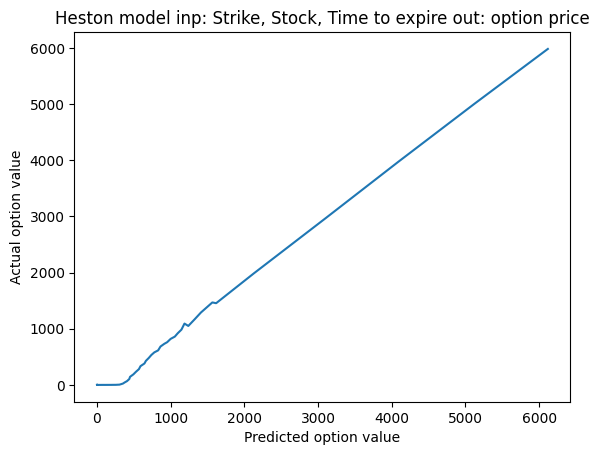

In [20]:
import matplotlib.pyplot as plt 

X = new_final_pred_options
Y = new_option_price

plt.plot(X, Y)

plt.xlabel("Predicted option value")
plt.ylabel("Actual option value")

plt.title("Heston model inp: Strike, Stock, Time to expire out: option price")

plt.show()

In [39]:
percentage_pred_error = []

for i, j in zip(new_option_price, new_final_pred_options):
    error = abs(i - j) / i
    error = error * 100
    
    percentage_pred_error.append(error)

In [21]:
diff = []

for i, j in zip(new_option_price, new_final_pred_options):
    diff.append(abs((i - j)))

mae = sum(diff)/len(diff)

print ("MAE : ", mae)


MAE :  110.5190696710227
